In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [140]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [141]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137592 entries, 0 to 1137591
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1137592 non-null  int64  
 1   kWh       1137592 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 17.4 MB


In [142]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1137587    0.13
1137588    0.13
1137589    0.13
1137590    0.13
1137591    0.13
Name: kWh, Length: 1137592, dtype: float64

In [143]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1137587    0.13
1137588    0.13
1137589    0.13
1137590    0.13
1137591    0.13
Name: kWh, Length: 1137592, dtype: float64

In [144]:
l=len(conso_data)-1
l

1137591

In [145]:
conso_data['sec']=conso_data['Interval']/1000


In [146]:
conso_data['Wh']=3600000/conso_data['Interval']


In [147]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [148]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137592 entries, 0 to 1137591
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1137592 non-null  int64  
 1   kWh        1137592 non-null  float64
 2   sec        1137592 non-null  float64
 3   Wh         1137592 non-null  float64
 4   cumul(ms)  1137592 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 43.4 MB


In [149]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1137587,27981,0.13,27.981,128.658733,26321925778
1137588,27829,0.13,27.829,129.361457,26321953607
1137589,27836,0.13,27.836,129.328927,26321981443
1137590,28383,0.13,28.383,126.836487,26322009826
1137591,28571,0.13,28.571,126.001890,26322038397


In [150]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

26322038397000

In [151]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 40, 23, 746210)

In [152]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [153]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [154]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [155]:
conso_data['dates']

0         2023-08-21 18:40:45.680210
1         2023-08-21 18:41:07.538210
2         2023-08-21 18:41:29.539210
3         2023-08-21 18:41:51.467210
4         2023-08-21 18:42:13.358210
                     ...            
1137587   2024-06-21 10:19:09.524210
1137588   2024-06-21 10:19:37.353210
1137589   2024-06-21 10:20:05.189210
1137590   2024-06-21 10:20:33.572210
1137591   2024-06-21 10:21:02.143210
Name: dates, Length: 1137592, dtype: datetime64[ns]

In [156]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:40:45.680210,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:41:07.538210,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:41:29.539210,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:41:51.467210,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:42:13.358210,21/08/23
...,...,...,...,...,...,...,...
1137587,27981,0.13,27.981,128.658733,26321925778,2024-06-21 10:19:09.524210,21/06/24
1137588,27829,0.13,27.829,129.361457,26321953607,2024-06-21 10:19:37.353210,21/06/24
1137589,27836,0.13,27.836,129.328927,26321981443,2024-06-21 10:20:05.189210,21/06/24
1137590,28383,0.13,28.383,126.836487,26322009826,2024-06-21 10:20:33.572210,21/06/24


In [157]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('21/06/24', 21, 6, 2024)

In [158]:
here = now.strftime('%H:%M:%S')
here

'10:21:20'

In [159]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [160]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 1136365 to 1137591
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1227 non-null   int64         
 1   kWh        1227 non-null   float64       
 2   sec        1227 non-null   float64       
 3   Wh         1227 non-null   float64       
 4   cumul(ms)  1227 non-null   int64         
 5   dates      1227 non-null   datetime64[ns]
 6   days       1227 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 76.7+ KB


In [161]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [162]:
data = list(df_grp['kWh'])
print(data)


[0.892, 3.699, 4.221, 3.695, 4.21, 4.625, 3.486, 3.395, 3.531, 3.683, 3.838, 3.72, 4.257, 3.856, 3.422, 3.631, 3.325, 3.45, 4.239, 4.017, 4.06, 3.893, 3.432, 4.487, 3.7, 3.82, 4.413, 4.661, 3.728, 3.224, 3.171, 4.052, 3.628, 3.186, 3.79, 4.173, 3.743, 3.558, 4.818, 4.167, 4.536, 3.777, 3.379, 4.317, 3.881, 3.881, 3.429, 4.077, 3.652, 3.401, 4.11, 3.401, 3.89, 3.829, 3.649, 3.745, 4.244, 3.286, 3.884, 2.956, 2.055, 2.041, 2.482, 4.085, 3.739, 4.325, 3.637, 3.895, 3.746, 3.961, 3.934, 4.14, 3.667, 3.168, 3.761, 3.54, 3.596, 3.704, 3.685, 3.231, 3.909, 3.265, 3.748, 3.586, 4.104, 3.673, 3.261, 3.826, 4.067, 4.385, 4.088, 4.0, 4.215, 3.743, 3.932, 3.876, 3.91, 3.757, 4.03, 4.337, 3.881, 3.532, 3.665, 3.665, 3.339, 3.856, 3.985, 4.121, 3.463, 4.179, 3.606, 4.129, 4.491, 3.693, 3.41, 3.593, 4.196, 3.644, 4.08, 3.982, 3.756, 3.579, 5.146, 3.695, 3.764, 4.298, 4.084, 4.781, 4.396, 3.936, 3.81, 4.377, 4.625, 4.242, 4.776, 4.344, 3.664, 4.24, 3.684, 3.609, 3.528, 3.972, 3.635, 3.789, 3.59, 3.496

In [163]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [164]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [165]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [166]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.312002
dtype: float64

In [167]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.717621
dtype: float64

In [168]:
last=df_grp.iloc[-1]['kWh']
last

1.227

In [169]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 1136365 to 1137591
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1227 non-null   int64         
 1   kWh        1227 non-null   float64       
 2   sec        1227 non-null   float64       
 3   Wh         1227 non-null   float64       
 4   cumul(ms)  1227 non-null   int64         
 5   dates      1227 non-null   datetime64[ns]
 6   days       1227 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 76.7+ KB


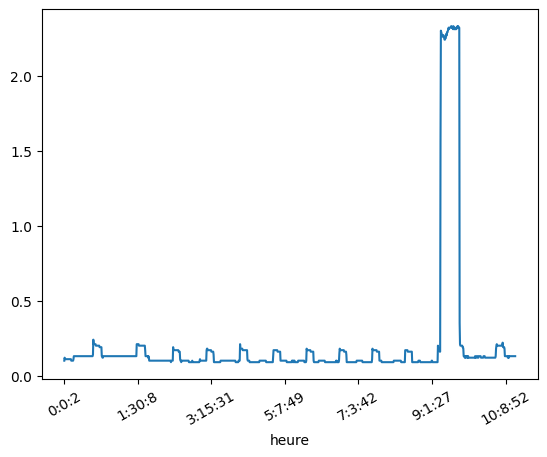

In [170]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [171]:
conso_day['heure']


1136365       0:0:2
1136366      0:0:33
1136367       0:1:4
1136368      0:1:37
1136369      0:2:10
             ...   
1137587     10:19:9
1137588    10:19:37
1137589     10:20:5
1137590    10:20:33
1137591     10:21:2
Name: heure, Length: 1227, dtype: object

In [172]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:2',
             days  kWh
  heure               
  0:0:2  21/06/24  0.1),
 ('0:0:33',
              days   kWh
  heure                 
  0:0:33  21/06/24  0.12),
 ('0:1:4',
             days   kWh
  heure                
  0:1:4  21/06/24  0.11),
 ('0:1:37',
              days   kWh
  heure                 
  0:1:37  21/06/24  0.11),
 ('0:2:10',
              days   kWh
  heure                 
  0:2:10  21/06/24  0.11),
 ('0:2:43',
              days   kWh
  heure                 
  0:2:43  21/06/24  0.11),
 ('0:3:16',
              days   kWh
  heure                 
  0:3:16  21/06/24  0.11),
 ('0:3:49',
              days   kWh
  heure                 
  0:3:49  21/06/24  0.11),
 ('0:4:23',
              days   kWh
  heure                 
  0:4:23  21/06/24  0.11),
 ('0:4:56',
              days   kWh
  heure                 
  0:4:56  21/06/24  0.11),
 ('0:5:29',
              days   kWh
  heure                 
  0:5:29  21/06/24  0.11),
 ('0:6:2',
             days   k

In [173]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:2',
  heure
  0:0:2    0.1
  Name: kWh, dtype: float64),
 ('0:0:33',
  heure
  0:0:33    0.12
  Name: kWh, dtype: float64),
 ('0:1:4',
  heure
  0:1:4    0.11
  Name: kWh, dtype: float64),
 ('0:1:37',
  heure
  0:1:37    0.11
  Name: kWh, dtype: float64),
 ('0:2:10',
  heure
  0:2:10    0.11
  Name: kWh, dtype: float64),
 ('0:2:43',
  heure
  0:2:43    0.11
  Name: kWh, dtype: float64),
 ('0:3:16',
  heure
  0:3:16    0.11
  Name: kWh, dtype: float64),
 ('0:3:49',
  heure
  0:3:49    0.11
  Name: kWh, dtype: float64),
 ('0:4:23',
  heure
  0:4:23    0.11
  Name: kWh, dtype: float64),
 ('0:4:56',
  heure
  0:4:56    0.11
  Name: kWh, dtype: float64),
 ('0:5:29',
  heure
  0:5:29    0.11
  Name: kWh, dtype: float64),
 ('0:6:2',
  heure
  0:6:2    0.11
  Name: kWh, dtype: float64),
 ('0:6:35',
  heure
  0:6:35    0.11
  Name: kWh, dtype: float64),
 ('0:7:8',
  heure
  0:7:8    0.11
  Name: kWh, dtype: float64),
 ('0:7:41',
  heure
  0:7:41    0.11
  Name: kWh, dtype: float64),
 ('0

In [174]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:2,34582,0.10,34.582,104.100399,26284778750,2024-06-21 00:00:02.496210,21/06/24
0:0:33,31076,0.12,31.076,115.845025,26284809826,2024-06-21 00:00:33.572210,21/06/24
0:1:4,31390,0.11,31.390,114.686206,26284841216,2024-06-21 00:01:04.962210,21/06/24
0:1:37,32709,0.11,32.709,110.061451,26284873925,2024-06-21 00:01:37.671210,21/06/24
0:2:10,32985,0.11,32.985,109.140518,26284906910,2024-06-21 00:02:10.656210,21/06/24
...,...,...,...,...,...,...,...
10:19:9,27981,0.13,27.981,128.658733,26321925778,2024-06-21 10:19:09.524210,21/06/24
10:19:37,27829,0.13,27.829,129.361457,26321953607,2024-06-21 10:19:37.353210,21/06/24
10:20:5,27836,0.13,27.836,129.328927,26321981443,2024-06-21 10:20:05.189210,21/06/24


In [175]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [176]:
df.iloc[0].dates

Timestamp('2024-06-21 00:00:02.496210')

In [177]:
df.dates.dt.time

heure
0:0:2       00:00:02.496210
0:0:33      00:00:33.572210
0:1:4       00:01:04.962210
0:1:37      00:01:37.671210
0:2:10      00:02:10.656210
                 ...       
10:19:9     10:19:09.524210
10:19:37    10:19:37.353210
10:20:5     10:20:05.189210
10:20:33    10:20:33.572210
10:21:2     10:21:02.143210
Name: dates, Length: 1227, dtype: object

In [178]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [179]:
tranches = len(df)//1000
tranches+1

2

In [180]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-06-21 00:00:02.496210	2024-06-21 09:00:49.869210	9h 0m 47s 	1000
2024-06-21 09:00:49.869210	2024-06-21 10:21:02.143210	1h 20m 12s 	227


In [181]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('10:21:20', 1.227, 1227)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 0:0:2 to 10:21:2
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1227 non-null   int64         
 1   kWh        1227 non-null   float64       
 2   sec        1227 non-null   float64       
 3   Wh         1227 non-null   float64       
 4   cumul(ms)  1227 non-null   int64         
 5   dates      1227 non-null   datetime64[ns]
 6   days       1227 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 109.0+ KB


In [183]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [184]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 21/08/23 to 21/06/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     306 non-null    float64
dtypes: float64(1)
memory usage: 4.8+ KB


In [185]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [186]:
df_grp.tail(7)

,kWh
days,
15/06/24,2.966
16/06/24,3.702
17/06/24,3.122
18/06/24,3.200
19/06/24,3.252
20/06/24,3.365
21/06/24,1.227


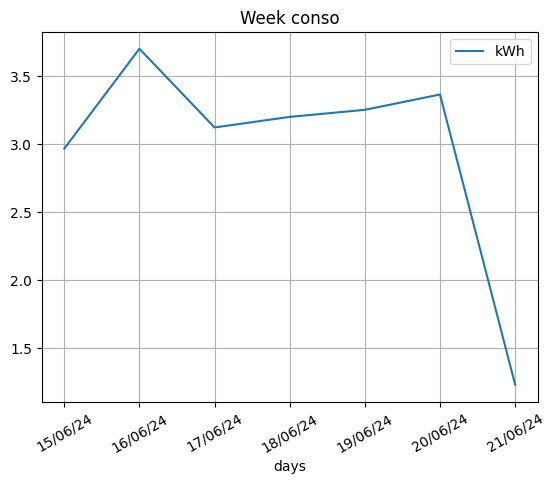

In [187]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [188]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [189]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


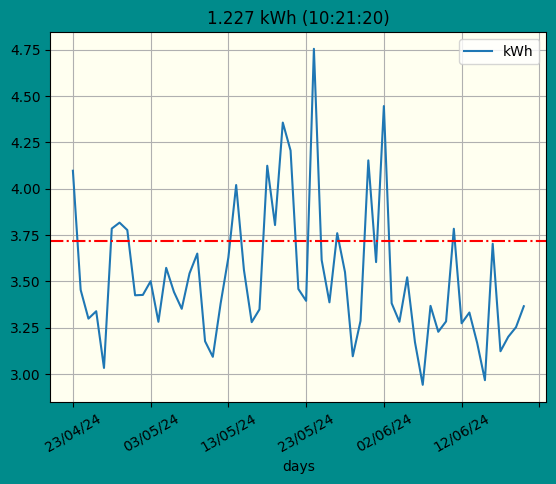

In [190]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [191]:
df_grp.mean()

kWh    3.717621
dtype: float64

In [192]:
#df_grp.head()
df_grp.tail(7)

,kWh
days,
15/06/24,2.966
16/06/24,3.702
17/06/24,3.122
18/06/24,3.200
19/06/24,3.252
20/06/24,3.365
21/06/24,1.227


In [193]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.460933
std,0.402835
min,2.941000
25%,3.233250
50%,3.366000
75%,3.589500
max,4.754000


In [194]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

24/05/24 4.754
07/06/24 2.941


In [195]:
day

'21/06/24'

In [196]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1136365,34582,0.10,34.582,104.100399,26284778750,2024-06-21 00:00:02.496210,21/06/24,0:0:2
1136366,31076,0.12,31.076,115.845025,26284809826,2024-06-21 00:00:33.572210,21/06/24,0:0:33
1136367,31390,0.11,31.390,114.686206,26284841216,2024-06-21 00:01:04.962210,21/06/24,0:1:4
1136368,32709,0.11,32.709,110.061451,26284873925,2024-06-21 00:01:37.671210,21/06/24,0:1:37
1136369,32985,0.11,32.985,109.140518,26284906910,2024-06-21 00:02:10.656210,21/06/24,0:2:10
...,...,...,...,...,...,...,...,...
1137587,27981,0.13,27.981,128.658733,26321925778,2024-06-21 10:19:09.524210,21/06/24,10:19:9
1137588,27829,0.13,27.829,129.361457,26321953607,2024-06-21 10:19:37.353210,21/06/24,10:19:37
1137589,27836,0.13,27.836,129.328927,26321981443,2024-06-21 10:20:05.189210,21/06/24,10:20:5
1137590,28383,0.13,28.383,126.836487,26322009826,2024-06-21 10:20:33.572210,21/06/24,10:20:33


In [197]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 1136365 to 1137591
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1227 non-null   int64         
 1   kWh        1227 non-null   float64       
 2   sec        1227 non-null   float64       
 3   Wh         1227 non-null   float64       
 4   cumul(ms)  1227 non-null   int64         
 5   dates      1227 non-null   datetime64[ns]
 6   days       1227 non-null   object        
 7   heure      1227 non-null   object        
 8   hours      1227 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 95.9+ KB


In [198]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1136365    00  0.10
  1136366    00  0.12
  1136367    00  0.11
  1136368    00  0.11
  1136369    00  0.11
  ...       ...   ...
  1136493    00  0.13
  1136494    00  0.13
  1136495    00  0.13
  1136496    00  0.13
  1136497    00  0.13
  
  [133 rows x 2 columns]),
 ('01',
          hours   kWh
  1136498    01  0.13
  1136499    01  0.13
  1136500    01  0.13
  1136501    01  0.13
  1136502    01  0.13
  ...       ...   ...
  1136622    01  0.10
  1136623    01  0.10
  1136624    01  0.10
  1136625    01  0.10
  1136626    01  0.10
  
  [129 rows x 2 columns]),
 ('02',
          hours   kWh
  1136627    02  0.10
  1136628    02  0.10
  1136629    02  0.10
  1136630    02  0.10
  1136631    02  0.10
  ...       ...   ...
  1136728    02  0.09
  1136729    02  0.09
  1136730    02  0.09
  1136731    02  0.09
  1136732    02  0.09
  
  [106 rows x 2 columns]),
 ('03',
          hours   kWh
  1136733    03  0.10
  1136734    03  0.11
  1136735    03  0.1

In [199]:
groupedbyhour.count()

,kWh
hours,
00,133
01,129
02,106
03,106
04,114
05,104
06,102
07,102
08,102


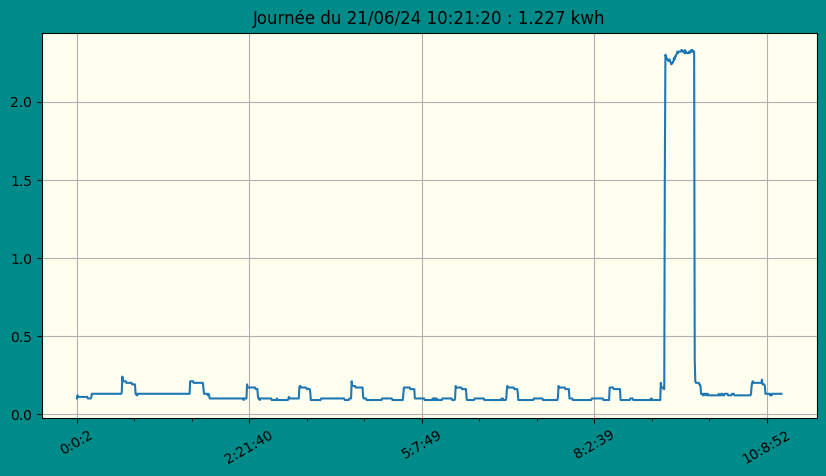

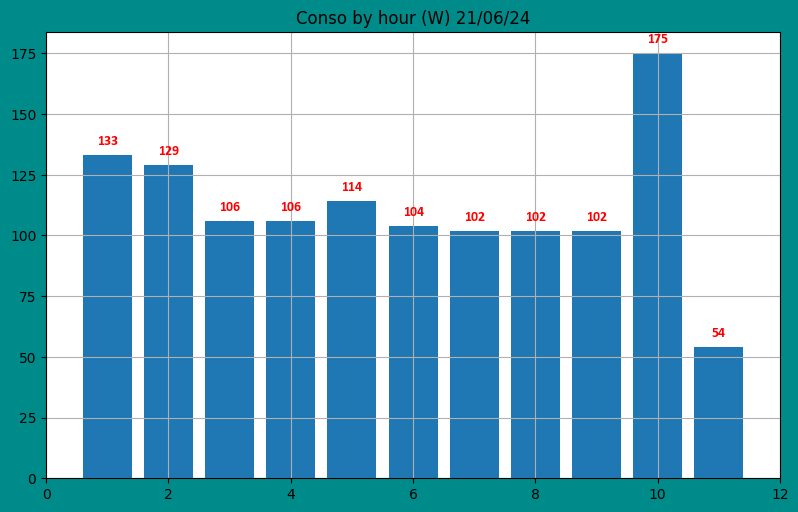

In [200]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [201]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [202]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [203]:
#conso_byhour(day)

In [204]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

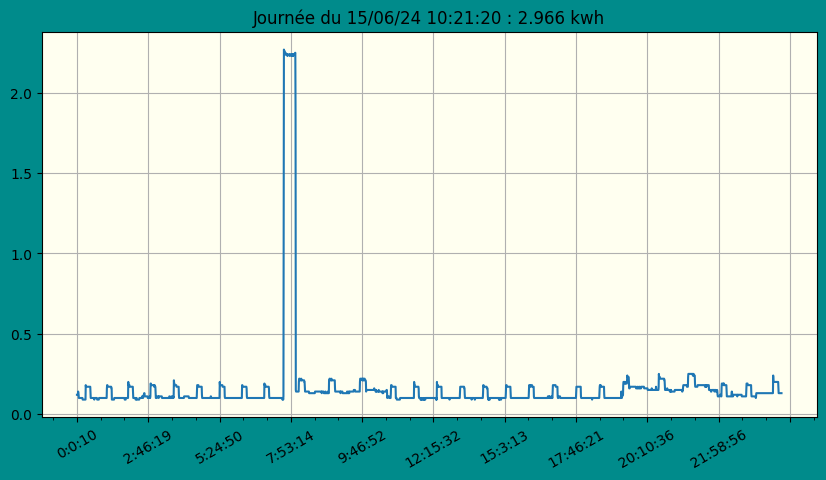

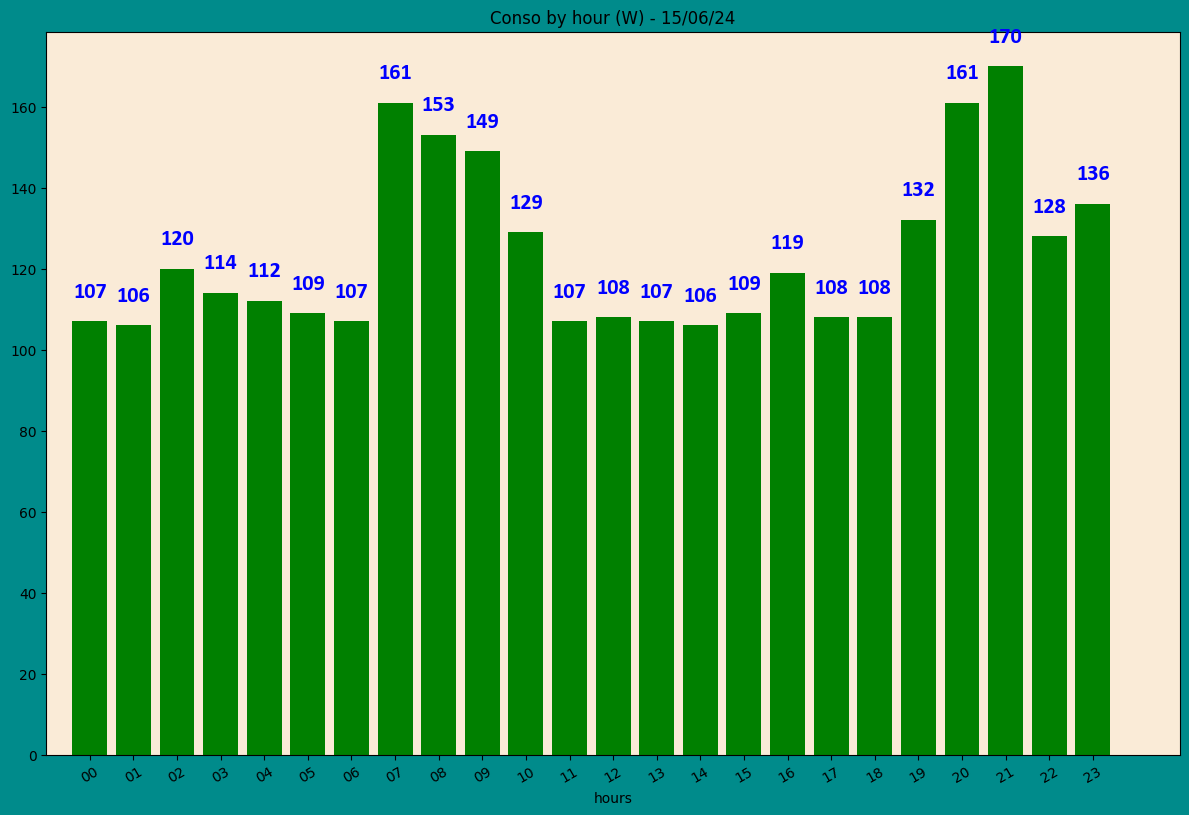

In [205]:
# plot any day
day = '15/06/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

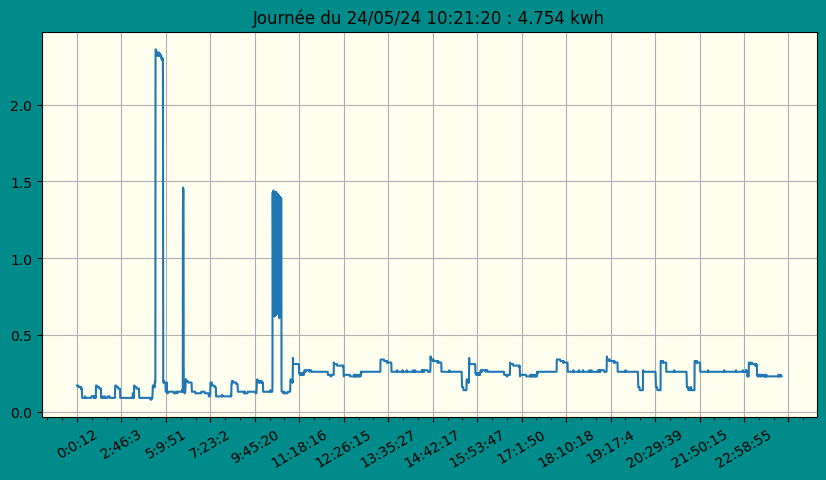

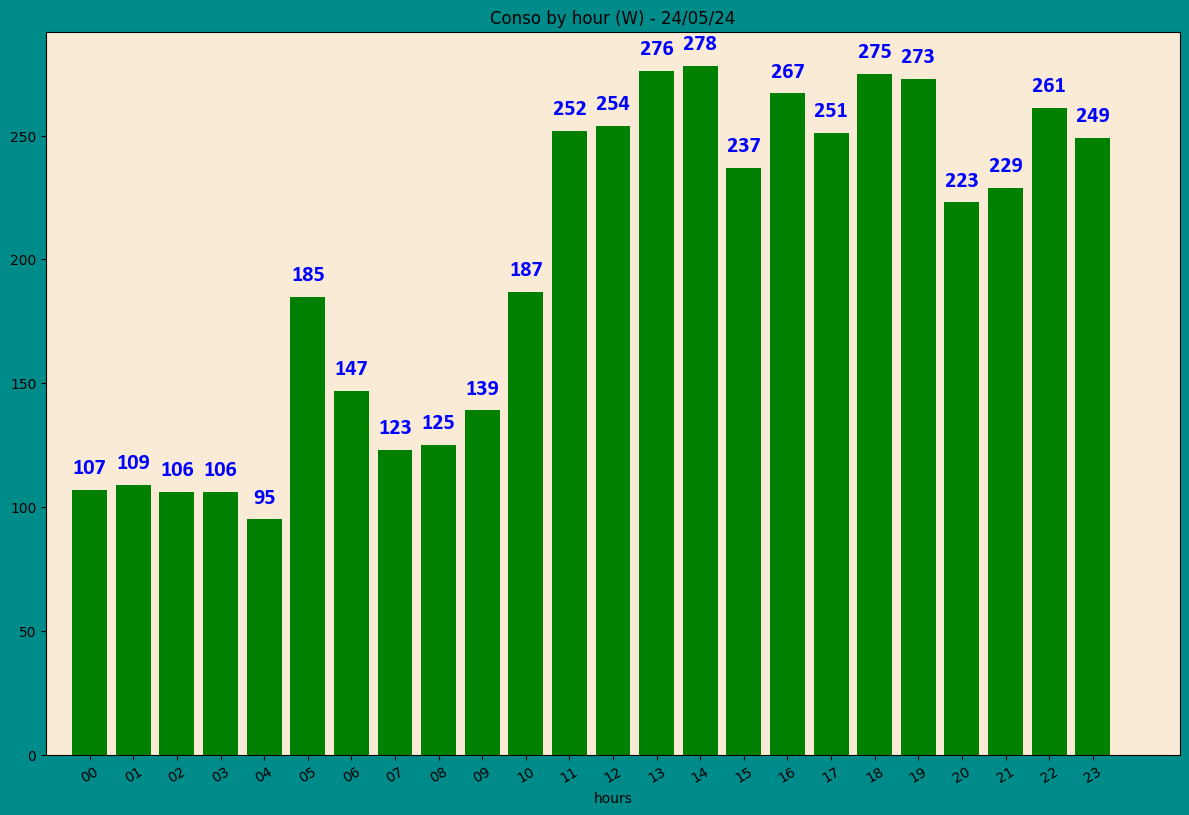

In [206]:
# plot day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [207]:
filename='conso_data.csv'
#conso_data.to_csv(filename)